In [130]:
import pandas as pd
import numpy as np
data = pd.read_csv('mnist_test.csv')
data.head()



,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
# def sigmoid(z):
#     return 1 / (1+np.exp(-z))

# class LossFunction:
#     def __init__(self, X, y):
#         self.X = X
#         self.y = y
    
#     def loss(self, a : np.ndarray):
#         prob = sigmoid(np.dot(self.X, a))
#         values = - self.y * np.log(prob) - (1 - self.y) * np.log(1 - prob)
#         return np.nansum(values) / self.y.shape[0]

#     def gradient(self, a : np.ndarray):
#         prob = sigmoid(np.dot(self.X, a))
#         sub_coefficient = -(self.y - prob) 
#         return np.dot(self.X.T, sub_coefficient) / self.y.shape[0]
    
#     def precision(self, a : np.ndarray):
#         prob = sigmoid(np.dot(self.X, a))
#         prob = np.array(prob >= 0.5, dtype=np.int32)
#         return np.sum(prob == self.y) / self.y.shape[0]


        


In [132]:
X = data.drop('label', axis=1).values
# X: shape m x 784
#append a column of 1s
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
y = data['label'].values
X.shape, y.shape


((10000, 785), (10000,))

In [133]:
loss_functions = []
for digit in range(10):
    y_digit = np.array(y == digit, dtype=np.int32)
    loss_functions.append(LossFunction(X, y_digit))

In [134]:
def gradient_descent(loss_func, starting_point, learning_rate = 0.00001, num_steps = 40, precision=0.00001):
    cur_point = starting_point
    for i in range(num_steps):
        grad = loss_func.gradient(cur_point)
        # print("Iteration {}: loss = {}, precision = {}".format(i, loss_func.loss(cur_point), loss_func.precision(cur_point)))
        cur_point = cur_point - learning_rate * grad
        if np.linalg.norm(grad) < precision:
            break
    return cur_point

In [135]:
optimal_points = []

for digit in range(10):
    optimal_point = gradient_descent(loss_functions[digit], np.zeros(X.shape[1]))
    print("Accuracy for digit {}: {}".format(digit, loss_functions[digit].precision(optimal_point)))
    optimal_points.append(optimal_point)

Accuracy for digit 0: 0.9875
Accuracy for digit 1: 0.9889
Accuracy for digit 2: 0.9711
Accuracy for digit 3: 0.9666
Accuracy for digit 4: 0.972
Accuracy for digit 5: 0.957
Accuracy for digit 6: 0.9784
Accuracy for digit 7: 0.9791
Accuracy for digit 8: 0.9348
Accuracy for digit 9: 0.949


In [136]:
def infer(X, optimal_points):
    prob = np.zeros((X.shape[0], 10))
    for digit in range(10):
        prob[:, digit] = sigmoid(np.dot(X, optimal_points[digit]))
    return np.argmax(prob, axis=1)

In [137]:
import matplotlib.pyplot as plt

def draw_digit(data, row_id):
    row = data.iloc[row_id]
    label = row['label']
    image = row.drop('label').values.reshape(28, 28)
    plt.title('Digit Label = {}'.format(label))
    plt.imshow(image, cmap='gray')
    plt.show()

In [138]:
data_test = pd.read_csv('mnist_test.csv')
X_test = data_test.drop('label', axis=1).values
X_test = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)
y_test = data_test['label'].values

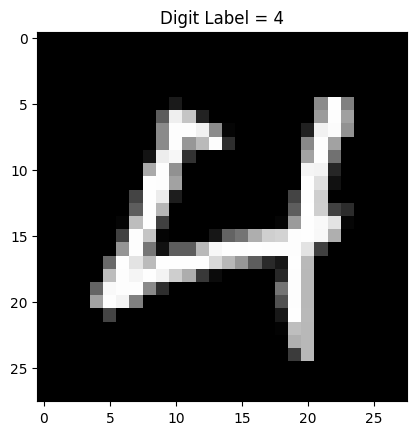

In [139]:
draw_digit(data_test, 2005)

In [140]:
infer(np.array([X_test[2005]]), optimal_points)

array([4], dtype=int64)

In [141]:
def evaluate(X, y, optimal_points):
    y_pred = infer(X, optimal_points)
    return np.sum(y_pred == y) / y.shape[0]
evaluate(X_test, y_test, optimal_points)

0.8819

In [142]:
# Immplementing the stable vẻsion of softmax function
def softmax(z):
    return np.exp(z-np.max(z, axis=0)) / np.sum(np.exp(z-np.max(z, axis=0)), axis=0)

class LogisticRegression:
    def __init__(self, X, y):
        self.X = X
        # Create one-hot encoding from vector y
        self.y = np.zeros((y.shape[0], 10))
        self.y[np.arange(y.shape[0]), y] = 1

    def loss_softmax(self, a: np.ndarray):
        prob = softmax(np.dot(self.X, a))
        #avoid inf
        prob = np.clip(prob, 1e-10, 1)
        values = -np.sum(self.y* np.log(prob))  
        return values / self.y.shape[0]
    
    def gradient(self, a: np.ndarray):
        prob = softmax(np.dot(self.X, a))
        sub_coefficient = prob - self.y
        return np.dot(self.X.T, sub_coefficient) / self.y.shape[0]
    
    def precision(self, a:np.ndarray):
        prob = softmax(np.dot(self.X, a))
        prob = np.argmax(prob, axis = 0)
        return np.sum(prob == self.y) / self.y.shape[0]
    
loss_func = LogisticRegression(X, y)
    #Randomly initialize a, each has real value from normal distribution between -0.01 and 0.01
a = np.random.randn(X.shape[1], 10) * 0.01  
loss_func.loss_softmax(a)

22.957171356733

In [147]:
# Adam optimizer
def adam(loss_func, starting_point, num_steps = 40, precision = 0.00001):
    cur_point = starting_point
    m = np.zeros(cur_point.shape)
    v = np.zeros(cur_point.shape)
    beta1 = 0.9
    beta2 = 0.999
    epsilon = 1e-8
    for i in range(num_steps):
        gra = loss_func.gradient(cur_point)
        m = beta1 * m + (1 - beta1) * gra
        v = beta2 * v + (1 - beta2) * gra**2
        m_hat = m / (1 - beta1**(i+1))
        v_hat = v / (1 - beta2**(i+1))
        cur_point = cur_point - 0.001 * m_hat / (np.sqrt(v_hat) + epsilon)
        if np.linalg.norm(gra) < precision:
            break
        print("Iteration {}: loss = {}, precision = {}".format(i, loss_func.loss_softmax(cur_point), loss_func.precision(cur_point)))
    return cur_point

In [150]:
W = adam(loss_func, num_steps=1000, precision=0.00001, starting_point=a)

Iteration 0: loss = 22.979595051478857, precision = 0.0
Iteration 1: loss = 22.997014585786367, precision = 0.0
Iteration 2: loss = 23.00139603337103, precision = 0.0
Iteration 3: loss = 23.00630407741307, precision = 0.0
Iteration 4: loss = 23.014016676808044, precision = 0.0
Iteration 5: loss = 23.01667316630541, precision = 0.0
Iteration 6: loss = 23.017309276795526, precision = 0.0
Iteration 7: loss = 23.01792576385205, precision = 0.0
Iteration 8: loss = 23.01886512333145, precision = 0.0
Iteration 9: loss = 23.01979908267686, precision = 0.0
Iteration 10: loss = 23.02049441455881, precision = 0.0
Iteration 11: loss = 23.020715852866285, precision = 0.0
Iteration 12: loss = 23.020937259540663, precision = 0.0
Iteration 13: loss = 23.02115864367981, precision = 0.0
Iteration 14: loss = 23.021245759754542, precision = 0.0
Iteration 15: loss = 23.02124575975459, precision = 0.0
Iteration 16: loss = 23.021245759754674, precision = 0.0
Iteration 17: loss = 23.021245759754816, precision

In [ ]:
# Implement focal loss to deal with the imbalanced data
class FocalLoss:
    def __init__(self, X, y):
        self.X = X
        self.y = y
    def focal_loss(self, a:np.ndarray, gamma = 2, alpha = 0.25):
        prob = softmax(np.dot(self.X, a))
        values = - alpha * (1 - prob) ** gamma * np.log(prob)
        return np.nansum(values) / self.y.shape[0]

    def gradient_focal_loss(self, a:np.ndarray, gamma = 2, alpha = 0.25):
        prob = softmax(np.dot(self.X, a))
        sub_coefficient = - alpha * (1 - prob) ** gamma * (gamma * prob * np.log(prob) + prob - 1)
        return np.dot(self.X.T, sub_coefficient) / self.y.shape[0]

    def precision_focal_loss(self, a:np.ndarray):
        prob = softmax(np.dot(self.X, a))
        prob = np.argmax(prob, axis = 0)
        return np.sum(prob == self.y) / self.y.shape[0]



In [ ]:

loss_functions = []
for digit in range(10):
    y_digit = np.array(y == digit, dtype=np.int32)
    loss_functions.append(FocalLoss(X, y_digit))

In [ ]:
def gradient_softmax_process(loss_func, starting_point, learning_rate = 0.00001, num_steps = 40, precision=0.00001):
    cur_point = starting_point
    for i in range(num_steps):
        grad = loss_func.gradient_focal_loss(cur_point)
        cur_point = cur_point - learning_rate * grad
        if np.linalg.norm(grad) < precision:
            break
    return cur_point

In [ ]:
optimal_points = []

for digit in range(10):
    optimal_point = gradient_softmax_process(loss_functions[digit], np.zeros(X.shape[1]))
    print("Accuracy for digit {}: {}".format(digit, loss_functions[digit].precision_focal_loss(optimal_point)))
    optimal_points.append(optimal_point)